<a href="https://colab.research.google.com/github/heejjj/Sleeping_Project/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applewatch data 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/KDT_python/project/Hackathon/Sleep Analysis Data (1).csv')

In [3]:
data.shape

(2955, 5)

In [4]:
data.head()

,Start,End,Duration (hr),Value,Source
0,2023-02-13 23:21:07,2023-02-14 08:47:48,9.440,InBed,NHC
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,Core,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,Deep,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,Core,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,Deep,Sujeong의 Apple Watch


In [5]:
data.tail()

,Start,End,Duration (hr),Value,Source
2950,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,REM,Sujeong의 Apple Watch
2951,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,Core,Sujeong의 Apple Watch
2952,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,Awake,Sujeong의 Apple Watch
2953,2023-05-03 07:30:05,2023-05-03 07:31:05,0.017,Core,Sujeong의 Apple Watch
2954,2023-05-03 07:30:05,2023-05-03 07:31:05,0.017,InBed,Sujeong의 Apple Watch


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Start          2955 non-null   object 
 1   End            2955 non-null   object 
 2   Duration (hr)  2955 non-null   float64
 3   Value          2955 non-null   object 
 4   Source         2955 non-null   object 
dtypes: float64(1), object(4)
memory usage: 115.6+ KB


In [7]:
# 데이터 저장.
sleep = data

# EDA

- "data"는 2023.02.13 저녁부터 2023.05.03까지의 수면시간 데이터가 저장되어 있음.

- Start
- End
- Duration (hr)
- Value : 수면 깊이. deep, core, rem, awake
- Source : nhc(휴대폰), Sujeong의 Apple watch(워치)

- ['Source' == 'nhc'] 의 'Value'가 'InBed'인 경우는 한 번 수면한 총 시간 정보를 가지고 있으므로 따로 저장하여 도탈 시간과 비교하여 데이터가 정교한지(?)를 확인.
- ['Source' == 'Sujeong의 Apple watch'] 의 'Value'가 'InBed'인 경우는 이상치로 구분하여 drop 하기로 결정.

- 분석 구간 (2/17, 2/25, 3/20, 3/26, 4/22 에 워치를 착용하지 않고 수면함. 이상치 -> 제거 결정, 규칙적인 수면이 시작되는 2/26일부터 분석 시작)
  - first - 2/26-3/25 (2/26-3/20, 3/22-3/25)
  - second- 3/27~4/21
  - third - 4/23~5/3 

- deep: 1, core:2, rem:3, awake:4

In [8]:
# total 수면 시간 비교를 위한 "nhc" 데이터셋 생성
InBed = data[data["Value"]=='InBed']
nhc = InBed[InBed["Source"] == 'NHC']

# 워치 데이터에서 InBed를 제외한 데이터인 "watch" 데이터셋 생성.
watch = data[data["Source"] != 'NHC']
watch = watch[watch['Value'] != "InBed"]

In [9]:
nhc.head()

,Start,End,Duration (hr),Value,Source
0,2023-02-13 23:21:07,2023-02-14 08:47:48,9.44,InBed,NHC
36,2023-02-14 23:16:52,2023-02-15 09:00:24,9.73,InBed,NHC
93,2023-02-15 23:50:07,2023-02-16 06:36:44,6.78,InBed,NHC
138,2023-02-16 06:36:50,2023-02-16 09:00:17,2.39,InBed,NHC
160,2023-02-17 00:40:33,2023-02-17 09:00:08,8.33,InBed,NHC


In [10]:
watch.head()

,Start,End,Duration (hr),Value,Source
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,Core,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,Deep,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,Core,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,Deep,Sujeong의 Apple Watch
5,2023-02-14 00:38:25,2023-02-14 00:39:55,0.025,Core,Sujeong의 Apple Watch


In [11]:
# "Source" 열의 데이터를 레이블링 해줌.
# deep: 1, core:2, rem:3, awake:4
watch['Value']= watch['Value'].replace('Deep',1)
watch['Value']= watch['Value'].replace('Core',2)
watch['Value']= watch['Value'].replace('REM',3)
watch['Value']= watch['Value'].replace('Awake',4)

In [12]:
watch.head()

,Start,End,Duration (hr),Value,Source
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,2,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,1,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,2,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,1,Sujeong의 Apple Watch
5,2023-02-14 00:38:25,2023-02-14 00:39:55,0.025,2,Sujeong의 Apple Watch


In [13]:
# Series to datetime
# 데이터 타입을 datetime으로 변경. 날짜와 시간 추출이 가능하도록 함.
watch['Start'] = pd.to_datetime(watch['Start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
watch['End'] = pd.to_datetime(watch['End'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [14]:
watch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 1 to 2953
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Start          2267 non-null   datetime64[ns]
 1   End            2267 non-null   datetime64[ns]
 2   Duration (hr)  2267 non-null   float64       
 3   Value          2267 non-null   int64         
 4   Source         2267 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 106.3+ KB


# 시각화

In [15]:
watch.columns

Index(['Start', 'End', 'Duration (hr)', 'Value', 'Source'], dtype='object')

In [16]:
date_time = pd.to_datetime(watch['Start'], format='%d.%m.%Y %H:%M:%S')

In [17]:
date_time

1      2023-02-13 23:50:25
2      2023-02-14 00:07:25
3      2023-02-14 00:27:25
4      2023-02-14 00:30:25
5      2023-02-14 00:38:25
               ...        
2948   2023-05-03 06:16:05
2950   2023-05-03 06:44:05
2951   2023-05-03 07:09:05
2952   2023-05-03 07:29:05
2953   2023-05-03 07:30:05
Name: Start, Length: 2267, dtype: datetime64[ns]

In [18]:
plot_features = watch["Value"]
plot_features.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2942, 2944, 2945, 2946, 2947, 2948, 2950, 2951, 2952, 2953],
           dtype='int64', length=2267)

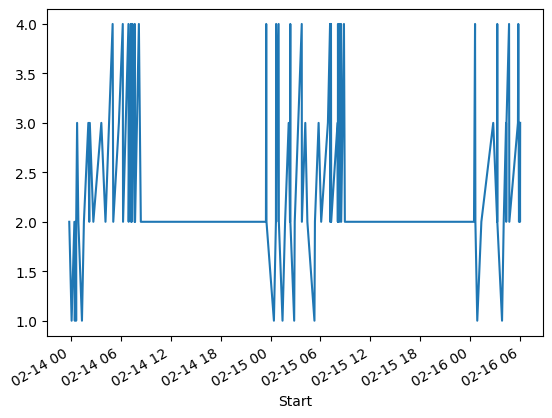

In [19]:
# plot_features = watch["Value"]
# plot_features.index = date_time
# _ = plot_features.plot(subplots=True)

plot_features = watch["Value"][:100]
plot_features.index = date_time[:100]
_ = plot_features.plot(subplots=True)

In [20]:
# 시계열 데이터를 가지고 딥러닝 모델을 학습시키는 경우 train 과 test 데이터 셋은 어떻게 나누는가?? 하루 수면 데이터를 따로 저장해두고 test로 사용하면 되는건가?
# training_set = df.iloc[:800, 1:2].values
# test_set = df.iloc[800:, 1:2].values
# 이와 같이 index를 랜덤으로 뽑는 것이 아니라 연속적으로 슬라이싱 해준다.
# 훈련, 검증 및 테스트 세트에 (70%, 20%, 10%) 분할을 사용

In [21]:
# Min-Max Scaler
# 데이터 정규화는 어떤 col에 적용해주는가?
# 우리의 경우 categorical이 사용되므로 pass

In [22]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import keras
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.callbacks import EarlyStopping

In [23]:
watch.shape

(2267, 5)

In [24]:
# 훈련, 검증 및 테스트 세트에 (70%, 20%, 10%) 분할을 사용
# 2267 * 0.7  = 1588
# 2267 * 0.2 = 453
# 2267 * 0.1 = 226
1588 + 453 + 226

2267

In [25]:
watch.head()

,Start,End,Duration (hr),Value,Source
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,2,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,1,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,2,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,1,Sujeong의 Apple Watch
5,2023-02-14 00:38:25,2023-02-14 00:39:55,0.025,2,Sujeong의 Apple Watch


In [26]:
watch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 1 to 2953
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Start          2267 non-null   datetime64[ns]
 1   End            2267 non-null   datetime64[ns]
 2   Duration (hr)  2267 non-null   float64       
 3   Value          2267 non-null   int64         
 4   Source         2267 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 106.3+ KB


In [27]:
train = watch.iloc[:1588, [0,3]]
train.shape

(1588, 2)

In [28]:
train.head()

,Start,Value
1,2023-02-13 23:50:25,2
2,2023-02-14 00:07:25,1
3,2023-02-14 00:27:25,2
4,2023-02-14 00:30:25,1
5,2023-02-14 00:38:25,2


In [29]:
val = watch.iloc[1588:2041, [0,3]]
val.shape

(453, 2)

In [30]:
test = watch.iloc[2041:, [0,3]]
test.shape

(226, 2)

In [31]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []

for i in range(60, 1588):

   X_train.append(train.iloc[i-60:i, 1])
   y_train.append(train.iloc[i, 1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # 형식(#값, #타임스텝, #1차원 출력)으로 재배열

In [32]:
X_train.shape

(1528, 60, 1)

In [33]:
# 50개의 뉴런과 4개의 숨겨진 층으로 LSTM을 만들 것이다.
# 마지막으로, 우리는 주가를 예측하기 위해 출력층에 1개의 뉴런을 할당할 것이다. 
# MSE 손실 함수와 Adam stochastic gradient decent optimizer를 사용할 것이다.

In [34]:
# Dropout을 사용해도 되는가?

In [35]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
48/48 [==============================] - 13s 15ms/step - loss: 1.6532
Epoch 2/100
48/48 [==============================] - 1s 14ms/step - loss: 0.9888
Epoch 3/100
48/48 [==============================] - 1s 14ms/step - loss: 0.9829
Epoch 4/100
48/48 [==============================] - 1s 14ms/step - loss: 0.9874
Epoch 5/100
48/48 [==============================] - 1s 14ms/step - loss: 0.9982
Epoch 6/100
48/48 [==============================] - 1s 15ms/step - loss: 0.9865
Epoch 7/100
48/48 [==============================] - 1s 14ms/step - loss: 0.9573
Epoch 8/100
48/48 [==============================] - 1s 14ms/step - loss: 0.9842
Epoch 9/100
48/48 [==============================] - 1s 17ms/step - loss: 0.9695
Epoch 10/100
48/48 [==============================] - 1s 21ms/step - loss: 0.9769
Epoch 11/100
48/48 [==============================] - 1s 20ms/step - loss: 0.9454
Epoch 12/100
48/48 [==============================] - 1s 20ms/step - loss: 0.9734
Epoch 13/100
48/48 [====

In [67]:
# val 데이터셋 준비
total = pd.concat((train, val), axis=0)
inputs = total[len(total) - len(val) - 60 : ].values

In [68]:
inputs

array([[Timestamp('2023-04-06 04:17:34'), 3],
       [Timestamp('2023-04-06 04:45:34'), 4],
       [Timestamp('2023-04-06 04:46:34'), 3],
       ...,
       [Timestamp('2023-04-25 00:38:19'), 4],
       [Timestamp('2023-04-25 00:38:49'), 2],
       [Timestamp('2023-04-25 00:53:49'), 1]], dtype=object)

In [65]:
# inputs = inputs.reshape(-1, 1)

In [69]:
inputs.shape

(513, 2)

In [70]:
X_val = []

for i in range(60, 513):
  X_val.append(inputs[i-60:i, 1])

X_val = np.array(X_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

print(X_val.shape)

(453, 60, 1)


In [78]:
# 예측하기
X_val = X_val.astype(np.float32)
y_pred = model.predict(X_val)

15/15 [==============================] - 2s 10ms/step


In [88]:
val.shape

(453, 2)

In [91]:
y_pred.shape

(453, 1)

In [118]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = train["Value"]
training_set_scaled = training_set_scaled.values.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set_scaled)

In [119]:
y_pred = sc.inverse_transform(y_pred)

In [126]:
val.iloc[:40,1]

2084    2
2086    4
2087    2
2089    1
2090    2
2091    1
2092    2
2093    4
2094    2
2096    3
2097    2
2098    1
2099    2
2100    4
2101    2
2103    3
2104    4
2105    3
2107    2
2108    3
2109    4
2110    2
2112    3
2113    4
2114    2
2116    4
2117    2
2120    2
2122    1
2123    2
2124    1
2125    2
2126    1
2127    2
2128    3
2129    2
2130    1
2131    2
2132    3
2133    2
Name: Value, dtype: int64

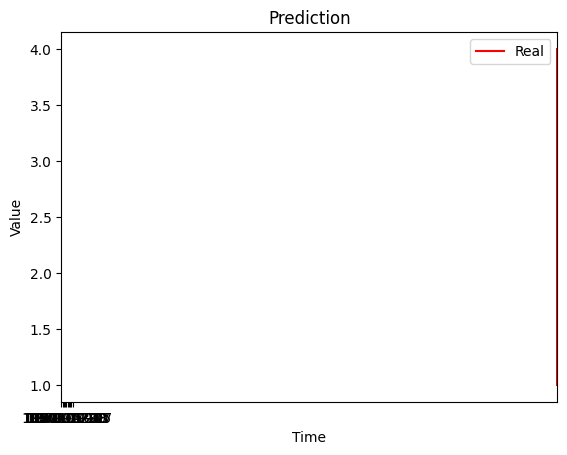

In [129]:
# 시각화
plt.plot(val.iloc[:40, 0], val.iloc[:40,1], color='red', label='Real')
# plt.plot(val.iloc[:40, 0], y_pred[:40], color='blue', label='Predicted')
plt.xticks(np.arange(0,459,50))

plt.title('Prediction')


plt.xlabel('Time')

plt.ylabel('Value')

plt.legend()

plt.show()